<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

`

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `replot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell immediately following the plot to describe the relationship between Attack and Defense in this dataset.

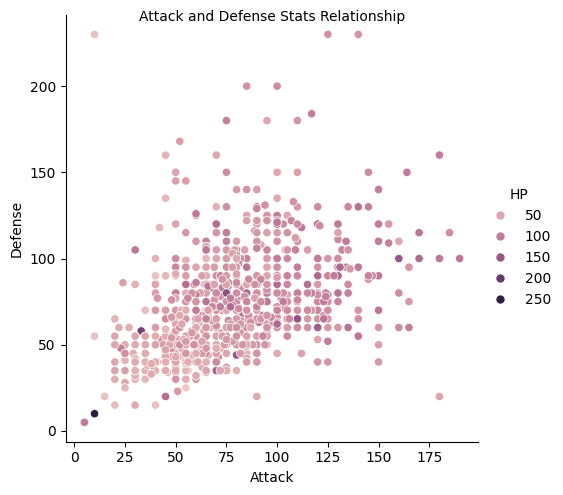

In [2]:
# Your code here . . .
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv')
# print(df.head())

plot = sns.relplot(
    data=df,
    x="Attack",
    y="Defense",
    hue="HP",
    )

plot.fig.suptitle("Attack and Defense Stats Relationship", fontsize=10)
plot

## From the plot, I observed that...

generally Attack and Defense stats have a positive correlation where Pokemon's attack stats are often followed by a similar value for defense stats. While there is a decent amount of variance in terms of Pokemon's ratio between Attack and Defense and also HP stats, most data points follow a similar trend. Pokemon with decently high Attack stats, for example, will generally have decently high Defense and HP stats. However, there are a few outliers. For example, there is a Pokemon with an insanely high defense stat above 200 but also has an attack stat below 25. This would signify that this Pokemon is optimized to be a tank that offers very little offensively. On the other hand, there is also a Pokemon with an incredibly high attack stat above 175 that has an abyssmal defense stat. This Pokemon would likely be offensively strong but unable to take hits from other Pokemon. I am guessing that Pokemon with low Attack and Defense stats are likely "baby" Pokemon while Pokemon that excel in both Attack and Defense stats are likely legendary Pokemon who have high stats across the board.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

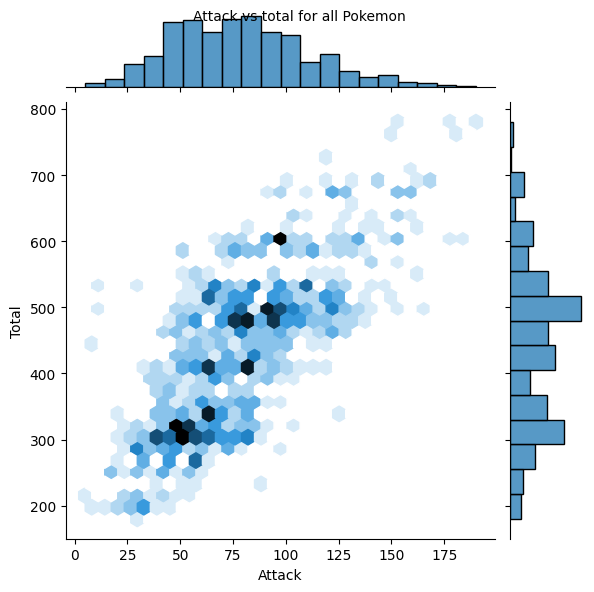

In [3]:
# Your code here . . .
plot = sns.jointplot(
    data=df,
    x="Attack",
    y="Total",
    kind="hex",
    gridsize=30
    )

plot.fig.suptitle("Attack vs total for all Pokemon", fontsize=10)
plot

## From the plot, I observed....

that Pokemon with a higher Attack stat generally also have a higher base stat total. The darker spots in the plot highlight that there are certain ratios between Attack and Base total stats are more common. For example, there is a concentration of Pokemon that fall around ~50 Attack and ~300 Total. I'm guessing that this combination of Pokemon stats often represents the very first "stage" of a Pokemon in terms of where it is in evolution. From what I know about Pokemon, "baby" pokemon or pokemon in their first stage of evolution tend to have very balanced stats overall with no stat being clearly superior. This checks out because Pokemon each have six different stat categories and 50 is exactly 1/6th of 300. When looking at the top and side distributions of these stats, you can see the common concentrations within different evolution stages more clearly. For example, there are spikes/peaks in the number of Pokemon that have around ~300 and ~500 for their total stats, signifying that there could be a pattern as I mentioned before with Pokemon evolution stages. Pokemon with extremely high attacks and also extremely high total stats are definitely legendary pokemon who have high stats across each category beyond just attack stats.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


(<seaborn.axisgrid.FacetGrid at 0x7d8393140fa0>,
 <seaborn.axisgrid.FacetGrid at 0x7d838d439a80>)

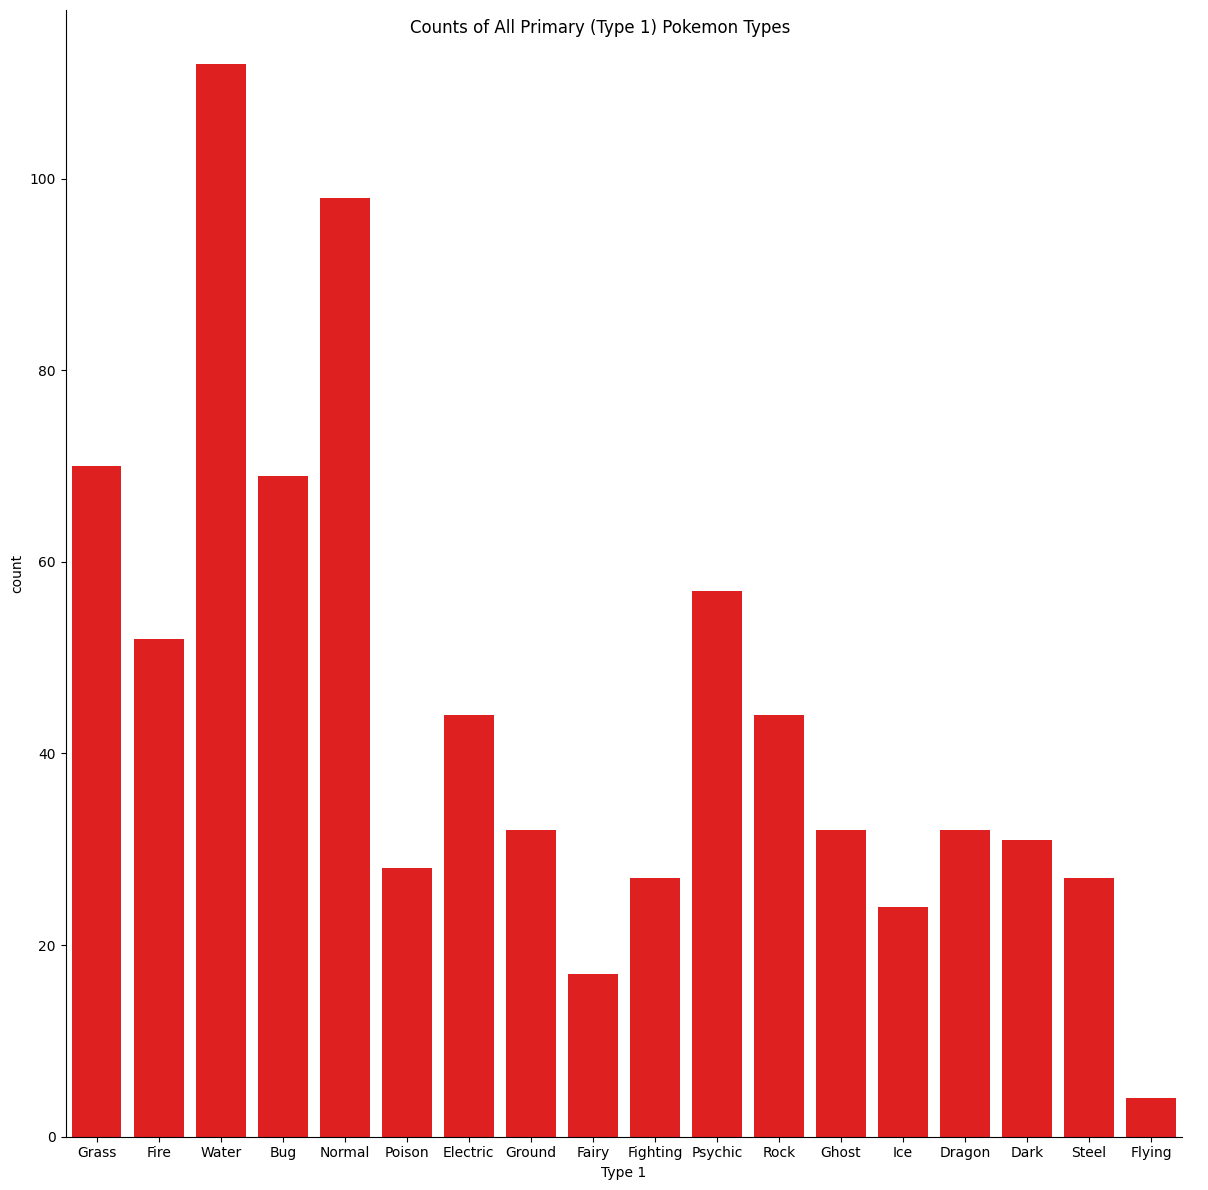

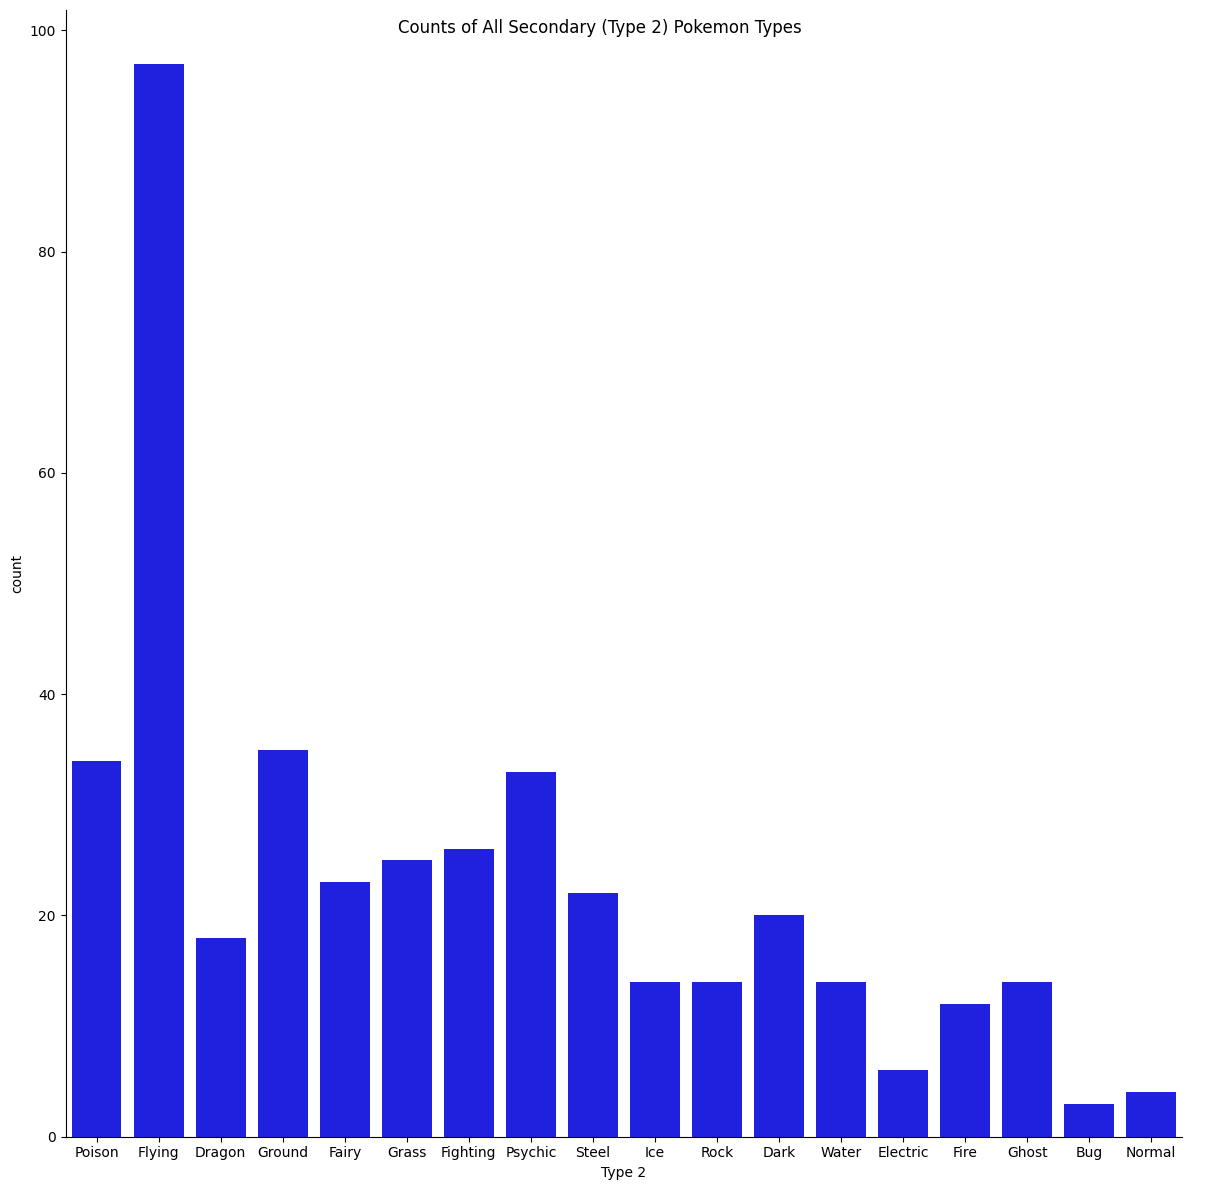

In [9]:
# Your code here . . .

type1plot = sns.catplot(
    data=df,
    x="Type 1",
    kind="count",
    color="red",
    height=12,
    aspect=1,
    ax=ax
    )

type1plot.fig.suptitle("Counts of All Primary (Type 1) Pokemon Types", fontsize=12)

type2plot= sns.catplot(
    data=df,
    x="Type 2",
    kind="count",
    color="blue",
    height=12,
    aspect=1,
    ax=ax
    )

type2plot.fig.suptitle("Counts of All Secondary (Type 2) Pokemon Types", fontsize=12)

type1plot,type2plot

## Question: Which are the most common Type 1 and Type 2 Pokemons, and which are the most rare ones?

### Answer:

The most common type 1 Pokemons are Grass, Water, Bug, and Normal types. The most common type 2 Pokemons are Poison, Flying, Ground, and Psychic with Flying type being by far the most common out of the type 2 Pokemon.


The most rare type 1 Pokemons are Fairy and Flying with Flying being by far the most rare Type 1. The most rare type 2 Pokemons are Electric, Bug and Normal types with Bug being the most uncommon.
